In [71]:
#!pip install transformers

In [1]:
#!pip install torch
import warnings
warnings.filterwarnings("ignore")


In [2]:
#apikey = 'e54273e22408c4418c1a0f708b0325dc,'apikey = '0913fab0ceb41e89384f2ad1ab888376',apikey = '1a9f19d476af4a497ae43371933757aa',apikey=21f97ace05f2e474fd48b3c809993e27
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from transformers import pipeline, BertTokenizer, TFBertForSequenceClassification
from transformers import pipeline

 # Importing Articles From API

In [25]:
apikey = '176cb1bfc2064cccf45c3c3e88307970'
query = 'apple'
# Create an empty DataFrame to store the articles
df = pd.DataFrame()
# Fetch data for the previous 100 days
start_date = datetime(2020, 7, 13)  # Define the start date
end_date = start_date - timedelta(days=100)  # Calculate the end date

for i in range((start_date - end_date).days + 1):
    date_from = (start_date - timedelta(days=i)).strftime('%Y-%m-%dT00:00:00Z')
    date_to = (start_date - timedelta(days=i)).strftime('%Y-%m-%dT23:59:59Z')
    url = f'https://gnews.io/api/v4/search?q={query}&lang=en&from={date_from}&to={date_to}&max=10&token={apikey}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = data['articles']
        daily_df = pd.DataFrame(articles, columns=['title', 'description', 'content', 'url', 'image', 'publishedAt', 'source'])
        # Convert the 'publishedAt' column to datetime
        daily_df['publishedAt'] = pd.to_datetime(daily_df['publishedAt'])
        # Append the daily DataFrame to the main DataFrame
        df = df.append(daily_df, ignore_index=True)
    else:
        print("Failed to fetch the data for", date_from)
    # Add a one-second delay between requests
    time.sleep(1)
# Convert the 'publishedAt' column to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df.set_index('publishedAt', inplace=True)

Failed to fetch the data for 2020-07-13T00:00:00Z
Failed to fetch the data for 2020-07-12T00:00:00Z
Failed to fetch the data for 2020-07-11T00:00:00Z
Failed to fetch the data for 2020-07-10T00:00:00Z
Failed to fetch the data for 2020-07-09T00:00:00Z
Failed to fetch the data for 2020-07-08T00:00:00Z
Failed to fetch the data for 2020-07-07T00:00:00Z
Failed to fetch the data for 2020-07-06T00:00:00Z
Failed to fetch the data for 2020-07-05T00:00:00Z
Failed to fetch the data for 2020-07-04T00:00:00Z
Failed to fetch the data for 2020-07-03T00:00:00Z
Failed to fetch the data for 2020-07-02T00:00:00Z
Failed to fetch the data for 2020-07-01T00:00:00Z
Failed to fetch the data for 2020-06-30T00:00:00Z
Failed to fetch the data for 2020-06-29T00:00:00Z
Failed to fetch the data for 2020-06-28T00:00:00Z
Failed to fetch the data for 2020-06-27T00:00:00Z
Failed to fetch the data for 2020-06-26T00:00:00Z
Failed to fetch the data for 2020-06-25T00:00:00Z
Failed to fetch the data for 2020-06-24T00:00:00Z


KeyError: 'publishedAt'

In [ ]:
df

<h3>Got data from gnews.oi API and converted them into data frame and the link is given below <a href="https://gnews.io/">click here</a></h3>

In [21]:
#saving the data based on the dates
min_date = df.index.min().strftime('%Y-%m-%d')
max_date = df.index.max().strftime('%Y-%m-%d')
filename = f'news_articles_{min_date}_to_{max_date}.csv'
df.to_csv(filename)
filename

'news_articles_2020-07-14_to_2020-10-21.csv'

In [23]:
# Import the CSV file into a DataFrame
df8 = pd.read_csv("news_articles_2021-08-18_to_2021-11-25.csv")
df7 = pd.read_csv("news_articles_2021-11-26_to_2022-03-05.csv")
df6 = pd.read_csv("news_articles_2022-03-06_to_2022-06-13.csv")
df5 = pd.read_csv("news_articles_2022-06-14_to_2022-07-03.csv")
df1 = pd.read_csv('news_articles_2022-07-04_to_2022-10-11.csv')
df2 = pd.read_csv('news_articles_2022-10-12_to_2023-01-19.csv')
df3 = pd.read_csv('news_articles_2023-01-19_to_2023-04-28.csv')
df4 = pd.read_csv('news_articles_2023-04-29_to_2023-07-17.csv')
df9 = pd.read_csv('news_articles_2021-05-10_to_2021-08-17.csv')
df10 = pd.read_csv('news_articles_2021-01-30_to_2021-05-09.csv')
df11 = pd.read_csv('news_articles_2020-10-22_to_2021-01-29.csv')
df12 = pd.read_csv('news_articles_2020-07-14_to_2020-10-21.csv')


In [24]:
# Combine the DataFrames
combined_df = pd.concat([df1, df2, df3, df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)
combined_df 
df = combined_df.sort_values('publishedAt', ascending=True)
df.set_index('publishedAt', inplace=True)
df

,title,description,content,url,image,source
publishedAt,,,,,,
2020-07-14 15:00:02+00:00,Best adventure games on Apple Arcade 2021,"Whether you want to explore a funky new world,...",Adventure games are a staple in the gaming wor...,https://www.imore.com/best-adventure-games-app...,https://www.imore.com/sites/imore.com/files/st...,"{'name': 'iMore', 'url': 'https://www.imore.com'}"
2020-07-14 17:57:35+00:00,iPhone 12 Could Ship With New Braided USB-C to...,Apple's upcoming iPhone 12 models could ship w...,Apple's upcoming iPhone 12 models could ship w...,https://www.macrumors.com/2020/07/14/apple-iph...,https://images.macrumors.com/t/3fn4dSVjSWtc9V3...,"{'name': 'MacRumors', 'url': 'https://www.macr..."
2020-07-15 09:41:00+00:00,Apple Wins Backing of EU General Court Over 13...,The EU General Court today overturned a ruling...,The EU General Court today overturned a ruling...,https://www.macrumors.com/2020/07/15/apple-win...,https://images.macrumors.com/t/hfRHS5L9MXjirFk...,"{'name': 'MacRumors', 'url': 'https://www.macr..."
2020-07-15 12:57:06+00:00,"Irish tax case – Apple didn't win, the EU lost",We today got a ruling in the long-running Iris...,We today got a ruling in the long-running Iris...,https://9to5mac.com/2020/07/15/irish-tax-case/,https://9to5mac.com/wp-content/uploads/sites/6...,"{'name': '9to5Mac', 'url': 'https://9to5mac.com'}"
2020-07-15 18:29:50+00:00,Justin Timberlake Movie ‘Palmer’ To Be Release...,Apple expands slate with Justin Timberlake-Fis...,Apple has landed the SK Global feature drama P...,https://deadline.com/2020/07/justin-timberlake...,https://deadline.com/wp-content/uploads/2020/0...,"{'name': 'Deadline', 'url': 'https://deadline...."
...,...,...,...,...,...,...
2023-07-17 22:23:00+00:00,4 features that are all but confirmed for the ...,"Less than two months from now, Apple will unve...","Less than two months from now, Apple will unve...",https://bgr.com/tech/4-features-that-are-all-b...,https://bgr.com/wp-content/uploads/2022/09/app...,"{'name': 'BGR', 'url': 'https://bgr.com'}"
2023-07-17 22:33:49+00:00,"Spain antitrust watchdog fines Amazon, Apple $...",Spain's antitrust watchdog on Tuesday said it ...,[1/2] The logo of the web service Amazon is pi...,https://www.reuters.com/technology/spain-antit...,https://www.reuters.com/resizer/ZKANptbqGAEFT7...,"{'name': 'Reuters', 'url': 'https://www.reuter..."
2023-07-17 22:55:54+00:00,Apple's iPhone 15 may come in new pink color,"The Apple iPhone 15 is just around the corner,...","The Apple iPhone 15 is just around the corner,...",https://www.androidheadlines.com/2023/07/apple...,https://www.androidheadlines.com/wp-content/up...,"{'name': 'Android Headlines', 'url': 'https://..."


In [26]:
combined_df.columns

Index(['publishedAt', 'title', 'description', 'content', 'url', 'image',
       'source'],
      dtype='object')

# Using Huggingfaces Finbert model for sentiment analysis

In [27]:
# Load the model and tokenizer
model = TFBertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis", from_pt=True, num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

# Create the sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Create a new DataFrame to store the sentiment scores
df_senti = pd.DataFrame(columns=['publishedAt', 'score'])

# Define a label to score mapping
label_to_score = {"positive": 1, "neutral": 0, "negative": -1}




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [28]:
# Combine the text columns and perform sentiment analysis for each row
for index, row in combined_df.iterrows():
    text = row['title'] + ' ' + row['description'] + ' ' + row['content']
    result = nlp(text)[0]
    
    # Get the sentiment score from the label
    sentiment_score = label_to_score[result['label']]
    
    # Multiply the score by the sentiment score
    sentiment_score *= result['score']
    
    # Add the sentiment score to the new DataFrame
    df_senti = df_senti.append({'publishedAt': row['publishedAt'], 'score': sentiment_score}, ignore_index=True)

In [29]:
df_senti

,publishedAt,score
0,2022-10-11 23:46:00+00:00,0.992917
1,2022-10-11 23:38:11+00:00,0.000000
2,2022-10-11 23:18:38+00:00,0.000000
3,2022-10-11 23:00:00+00:00,0.000000
4,2022-10-11 22:58:00+00:00,0.000000
...,...,...
10735,2020-07-15 18:29:50+00:00,0.000000
10736,2020-07-15 12:57:06+00:00,0.000000
10737,2020-07-15 09:41:00+00:00,0.931526
10738,2020-07-14 17:57:35+00:00,0.000000


In [30]:
# Convert 'publishedAt' to datetime and extract the date
df_senti['publishedAt'] = pd.to_datetime(df_senti['publishedAt']).dt.date

# Group by 'publishedAt' and calculate the mean
df_senti_avg = df_senti.groupby('publishedAt').mean().reset_index()

# Print the result
df_senti_avg.to_csv("sentiment_score")

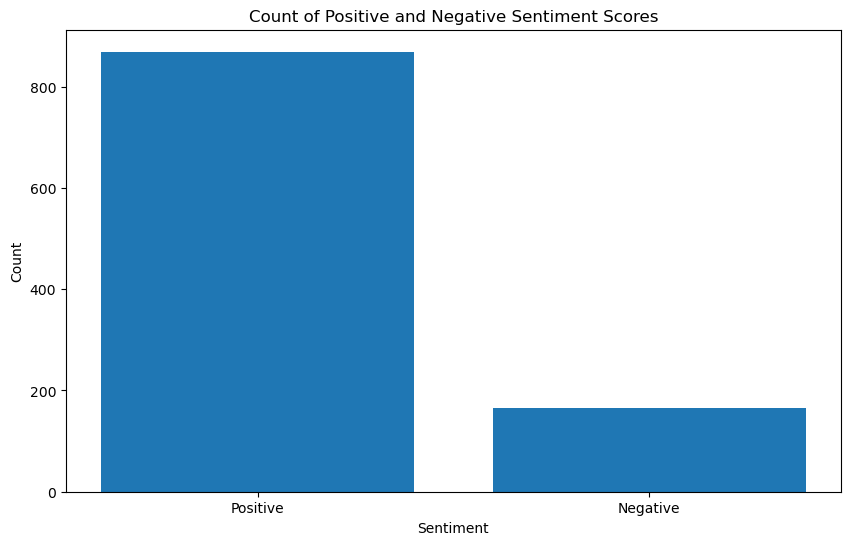

In [32]:
import matplotlib.pyplot as plt

# Count positive and negative scores
positive_count = df_senti_avg[df_senti_avg['score'] > 0].shape[0]
negative_count = df_senti_avg[df_senti_avg['score'] < 0].shape[0]

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.title('Count of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [33]:
positive_count,negative_count

(869, 165)

In [34]:
df_senti_avg.to_csv("Sentiment_score.csv", index=False)


In [35]:
# Load the sentiment score data
df_senti_avg = pd.read_csv('Sentiment_score.csv')
df_senti_avg.head()


,publishedAt,score
0,2020-07-14,0.000000
1,2020-07-15,0.234960
2,2020-07-16,0.722932
3,2020-07-17,0.327736
4,2020-07-18,0.000000


In [36]:
df_senti_avg

,publishedAt,score
0,2020-07-14,0.000000
1,2020-07-15,0.234960
2,2020-07-16,0.722932
3,2020-07-17,0.327736
4,2020-07-18,0.000000
...,...,...
1090,2023-07-13,0.080541
1091,2023-07-14,0.185541
1092,2023-07-15,0.000000
1093,2023-07-16,0.198184


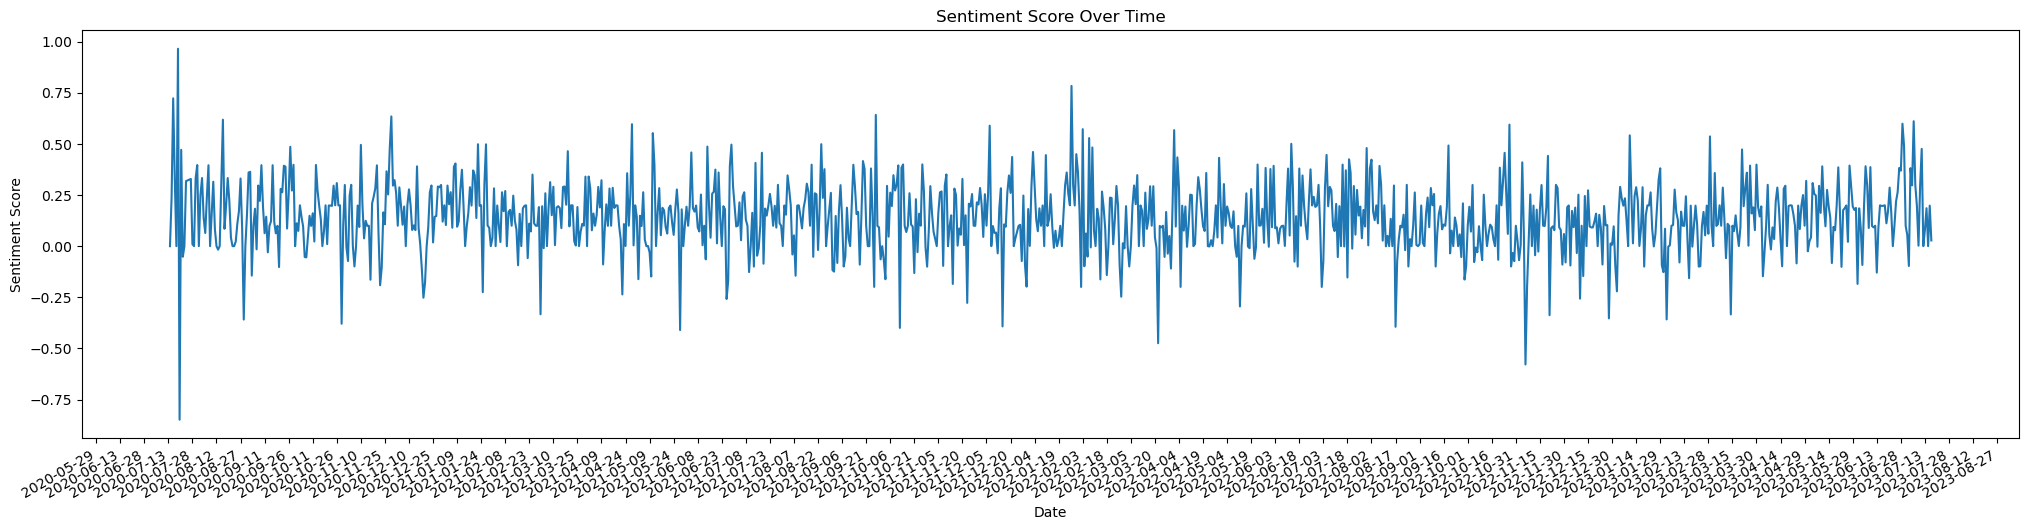

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'publishedAt' to datetime if it's not already
df_senti_avg['publishedAt'] = pd.to_datetime(df_senti_avg['publishedAt'])

plt.figure(figsize=(25,6))
plt.plot(df_senti_avg['publishedAt'], df_senti_avg['score'])
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xlim=['2022-07-04','2023-07-17']

# Format the x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format dates as 'YYYY-MM-DD'
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))  # show a date every 15 days
plt.gcf().autofmt_xdate()  # rotate the x labels so they don't overlap

plt.show()
